In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr


SFFF
FHFH
FFFH
HFFG
Success rate: 0.016


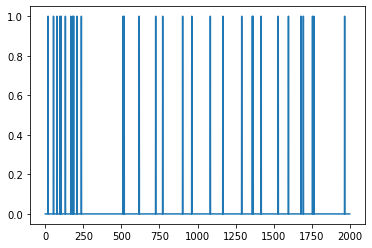

In [5]:
import gym
import random
from gym.envs.registration import register
import matplotlib.pyplot as plt

register(
    id='FrozenLake-v33',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name': '4x4',
            'is_slippery': False}
)

env = gym.make('FrozenLake-v0')
env.render()

num_episodes = 2000
rList = []
for i in range(num_episodes):
    # Reset environment and get first new observation
    env.reset()
    rAll = 0
    done = False

    while not done:
        # Random action
        action = random.randint(0, env.action_space.n - 1)

        # Get new state and reward from environment
        _state, reward, done, _info = env.step(action)

        # rAll will be 1 if success, o otherwise
        rAll += reward

    rList.append(rAll)

print("Success rate: " + str(sum(rList) / num_episodes))
plt.plot(rList)
plt.show()


Success rate: 0.9475
Final Q-Table Values
LEFT DOWN RIGHT UP
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]


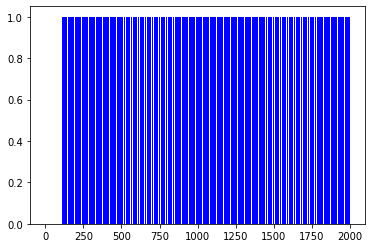

In [2]:
def rargmax(vector):
    """ Argmax that chooses randomly among eligible maximum indices. """
    m = np.amax(vector)
    indices = np.nonzero(vector == m)[0]
    return pr.choice(indices)


register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name': '4x4',
            'is_slippery': False}
)
env = gym.make('FrozenLake-v3')

# Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])
# Set learning parameters
num_episodes = 2000
# create lists to contain total rewards and steps per episode
rList = []
for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False

    # The Q-Table learning algorithm
    while not done:
        action = rargmax(Q[state, :])

        # Get new state and reward from environment
        new_state, reward, done, _ = env.step(action)

        # Update Q-Table with new knowledge using learning rate
        Q[state, action] = reward + np.max(Q[new_state, :])

        rAll += reward
        state = new_state

    rList.append(rAll)

print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()

In [3]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register

register(
    id='FrozenLake-v333',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name': '4x4',
            'is_slippery': False}
)

env = gym.make('FrozenLake-v3')

# Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])
# Discount factor
dis = .99
num_episodes = 2000


Success rate: 0.925
Final Q-Table Values
[[0.         0.         0.95099005 0.        ]
 [0.         0.         0.96059601 0.        ]
 [0.         0.970299   0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.99       0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.99       0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         0.        ]]


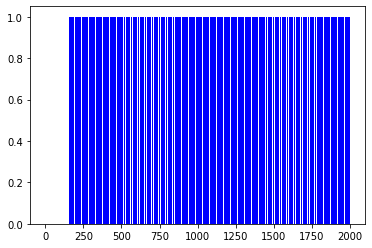

In [4]:
rList = []

for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False

    # The Q-Table learning algorithm
    while not done:
        # Choose an action by greedily (with noise) picking from Q table
        action = np.argmax(Q[state, :] + np.random.randn(1,
                                                         env.action_space.n) / (i + 1))

        # Get new state and reward from environment
        new_state, reward, done, _ = env.step(action)

        # Update Q-Table with new knowledge using decay rate
        Q[state, action] = reward + dis * np.max(Q[new_state, :])

        rAll += reward
        state = new_state

    rList.append(rAll)

print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()